### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### Loading the dataset

In [3]:
data = pd.read_csv("framingham.csv")
heart = pd.DataFrame(data)

### EDA

In [4]:
# viewing any 5 random values
heart.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3677,1,48,4.0,1,15.0,0.0,0,0,0,194.0,134.5,90.5,25.68,60.0,72.0,0
2921,1,55,1.0,1,45.0,0.0,0,0,0,345.0,134.0,89.0,27.38,72.0,60.0,0
2017,1,42,1.0,1,20.0,0.0,0,0,0,225.0,110.0,80.0,22.51,65.0,77.0,1
505,0,41,3.0,1,11.0,0.0,0,0,0,201.0,108.0,71.0,20.47,76.0,75.0,0
2632,1,44,2.0,0,0.0,0.0,0,0,0,267.0,131.0,79.0,30.32,70.0,79.0,0


In [5]:
#shape of the dataset
heart.shape

(4238, 16)

In [6]:
# describing the data
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
#finding missing values
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
#removing education column
heart.drop(columns=['education'],axis=1,inplace=True)
heart.sample(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2461,1,65,0,0.0,0.0,1,1,0,266.0,140.0,100.0,29.36,80.0,77.0,1
2671,0,59,0,0.0,0.0,0,0,0,364.0,142.0,84.0,26.24,67.0,70.0,0
191,1,56,1,30.0,0.0,0,0,0,241.0,109.0,70.0,20.12,62.0,87.0,1
4157,0,61,0,0.0,0.0,0,0,0,325.0,125.5,85.5,24.40,68.0,70.0,0
3777,0,61,1,20.0,0.0,0,0,0,286.0,141.0,81.0,23.61,80.0,52.0,0


In [9]:
#checking the shape of the dataset
heart.shape

(4238, 15)

In [10]:
heart.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
heart.dropna(axis=0,inplace=True)

In [12]:
heart.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
heart.corr()['diabetes']

male               0.011847
age                0.109257
currentSmoker     -0.045319
cigsPerDay        -0.039411
BPMeds             0.056322
prevalentStroke    0.009417
prevalentHyp       0.082096
diabetes           1.000000
totChol            0.047374
sysBP              0.104415
diaBP              0.051841
BMI                0.093061
heartRate          0.063383
glucose            0.616084
TenYearCHD         0.093190
Name: diabetes, dtype: float64

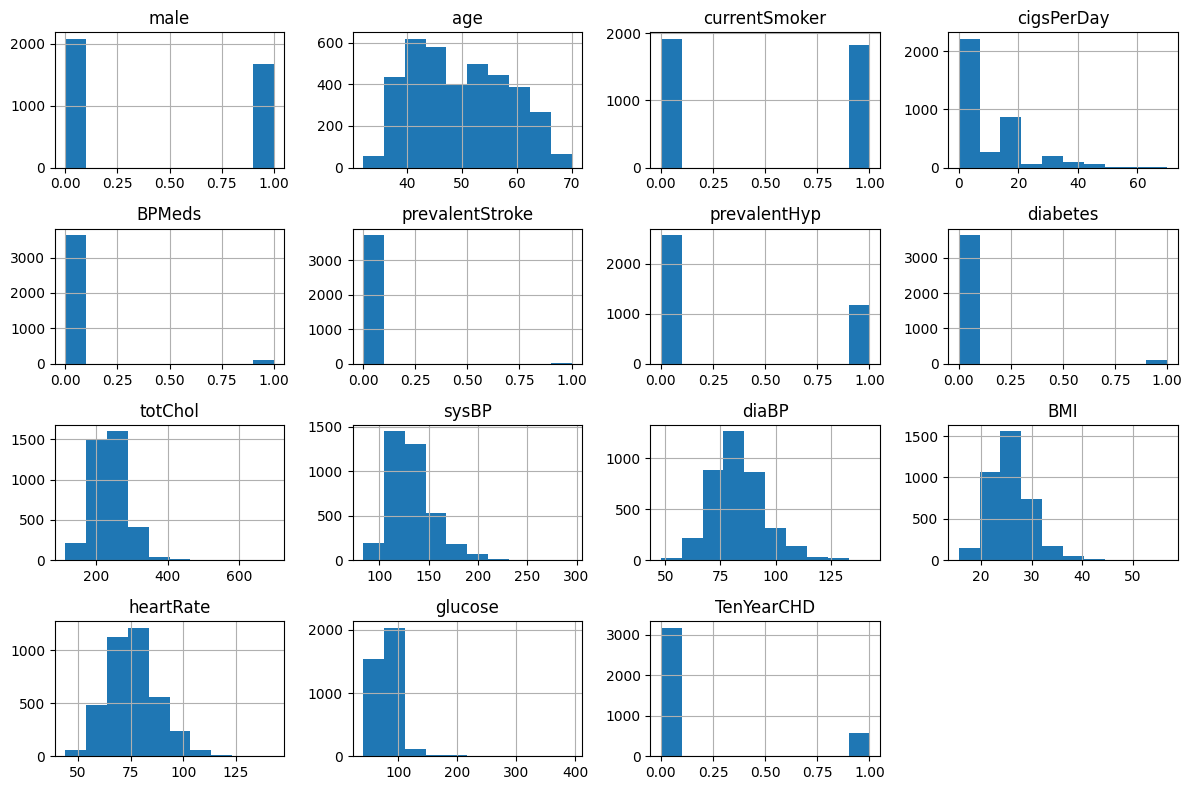

In [14]:
heart.hist(figsize=(12,8))
plt.tight_layout() 

In [15]:
Y = heart['diabetes']
X = heart.drop(columns=['diabetes'])

In [16]:
X.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()
for i in ['totChol','sysBP','diaBP','glucose','heartRate','cigsPerDay','age','BMI']:
    X[i]= scaler.fit_transform(X[[i]])


In [19]:
X.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,0.462601,0.488397,0.128648,0.030408,0.005601,0.311816,0.212612,0.231045,0.369669,0.248901,0.320242,0.118314,0.152574
std,0.497053,0.225508,0.499932,0.170321,0.171730,0.074643,0.463297,0.076519,0.104265,0.126279,0.098543,0.120785,0.067480,0.359624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.159520,0.158392,0.285714,0.182986,0.242424,0.087571,0.000000
50%,0.000000,0.447368,0.000000,0.000000,0.000000,0.000000,0.000000,0.207547,0.210402,0.359788,0.239215,0.313131,0.107345,0.000000
75%,1.000000,0.631579,1.000000,0.285714,0.000000,0.000000,1.000000,0.259005,0.286052,0.444444,0.303442,0.383838,0.132768,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
Y.sample(6)

2804    0
1095    0
1956    0
267     0
2622    0
1979    0
Name: diabetes, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [23]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(2999, 14) (2999,) (750, 14) (750,)


In [24]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [25]:
x_predictions = model.predict(x_train)
print(x_predictions)

[0 0 0 ... 0 0 0]


In [26]:
acc = accuracy_score(y_train,x_predictions)
print("train accuracy: ",acc*100)

train accuracy:  97.99933311103702


In [27]:
x_test_preds = model.predict(x_test)
print(x_test_preds[:10])

[0 0 0 0 0 0 0 0 0 0]


In [28]:
acc_test = accuracy_score(y_test,x_test_preds)
print("test accuracy :",acc_test*100)

test accuracy : 97.86666666666667
